# Chronic Kidney Disease

## [Overview](https://www.kidney.org/news/newsroom/factsheets/KidneyDiseaseBasics#:~:text=1%20in%203%20American%20adults,lived%20with%20a%20kidney%20transplant.)

Chronic kidney disease, or CKD, causes more deaths than breast cancer or prostate cancer. It is the under-recognized public health crisis. It affects an estimated 37 million people in the U.S. (15% of the adult population; more than 1 in 7 adults) and approximately 90% of those with CKD don’t even know they have it. 1 in 3 American adults (approximately 80 million people) is at risk for CKD. CKD is more common in women (15%) than men (12%). CKD is the 9th leading cause of death in the U.S. In 2017, over 500,000 patients received dialysis treatment, and over 200,000 lived with a kidney transplant. The National Kidney Foundation (NKF) has led the way in rallying action on this problem.

Chronic kidney disease (CKD) means your kidneys are damaged and losing their ability to keep you healthy. In the early stages of the disease, most people do not have symptoms. But as CKD gets worse, wastes can build up in your blood and make you feel sick. You may develop other problems like high blood pressure, anemia, weak bones, poor nutritional health, and nerve damage. Because kidneys are vital to so many of the body’s functions, CKD also increases your risk of having heart and blood vessel disease. While these problems may happen slowly and without symptoms, they can lead to kidney failure, which can appear without warning. Once kidneys fail, dialysis or a kidney transplant is needed to stay alive.

__Problem statement__: How might I be able to use a classification machine learning model to build a prediction model of whether a patient will progress in Chronic Kidney Disease staging given the patient's past longitudinal information.

For this challenge, I am given 9 datasets, they are Creatinine, DBP, SBP, Glucose, LDL, HGB, Meds, Stage and Demo. These datasets consist of 300 patients record. 

Creatine, DBP, SBP, Glucose, LDL and HGB datasets are about the reading of each patient at different time.

Meds dataset is about the medications taken by each patient.

Demo dataset is about the patient race, gender and age.

Stage dataset is about the current CKD stage progress of each patient.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
creatinine = pd.read_csv('data/T_creatinine.csv')
dbp = pd.read_csv('data/T_DBP.csv')
demo = pd.read_csv('data/T_demo.csv')
glucose = pd.read_csv('data/T_glucose.csv')
hgb = pd.read_csv('data/T_HGB.csv')
ldl = pd.read_csv('data/T_ldl.csv')
meds = pd.read_csv('data/T_meds.csv')
sbp = pd.read_csv('data/T_SBP.csv')
stage = pd.read_csv('data/T_stage.csv')

## Creatinine

Creatinine is a breakdown product of creatine phosphate from muscle and protein metabolism. It is released at a constant rate by the body.

Creatinine levels in the blood can vary depending on age, race and body size. A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an early sign that the kidneys are not working properly. As kidney disease progresses, the level of creatinine in the blood rises.

In [3]:
# Check the data shape
print(f'Creatinine table has {creatinine.shape[0]} data and {creatinine.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(creatinine.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(creatinine.info())
print('-'*88)

# Check number of unique id
print(f'Creatinine table has {creatinine["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(creatinine.isnull().sum())

Creatinine table has 1439 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,1.29,0
1,0,1.15,107
2,0,1.44,286
3,0,1.23,382
4,0,1.08,580
5,0,1.23,688
6,1,1.74,0
7,1,1.83,68
8,1,1.81,289
9,1,1.61,387


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1439 non-null   int64  
 1   value   1439 non-null   float64
 2   time    1439 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 33.9 KB


None

----------------------------------------------------------------------------------------
Creatinine table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [4]:
# to check unusual data
creatinine.describe()

,id,value,time
count,1439.000000,1439.000000,1439.000000
mean,148.706046,1.328999,293.828353
std,87.180040,0.357971,223.600131
min,0.000000,0.240000,0.000000
25%,73.500000,1.080000,84.000000
50%,149.000000,1.290000,296.000000
75%,225.000000,1.530000,488.500000
max,299.000000,3.020000,699.000000


In [5]:
# to remove duplicate data
creatinine.drop_duplicates()
creatinine.shape

(1439, 3)

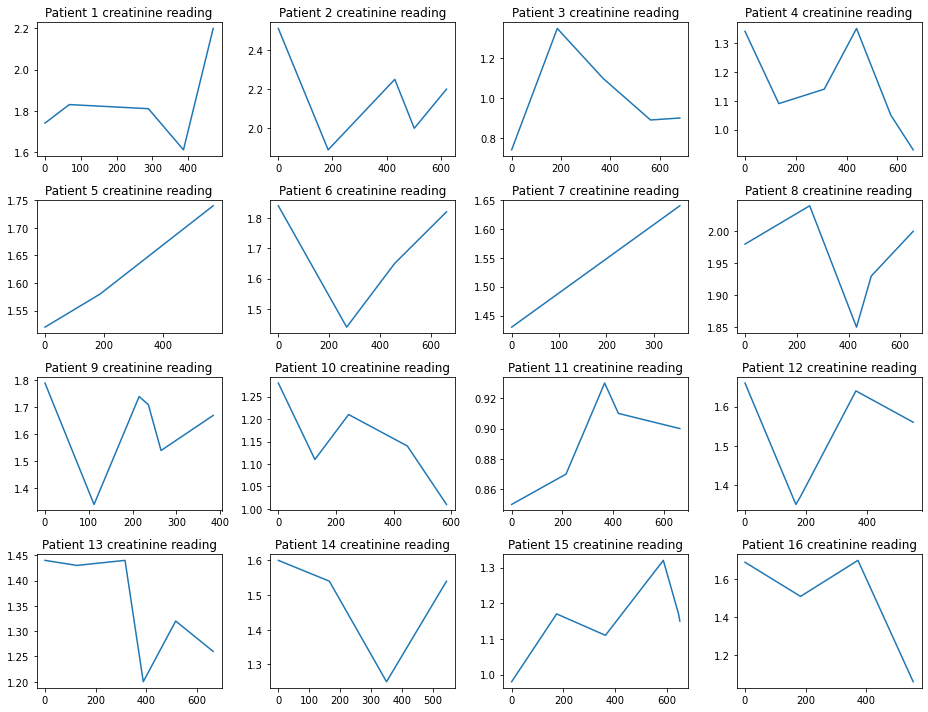

In [6]:
# to check the creatinine value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=creatinine[creatinine['id']==i])
    plt.title(f'Patient {i} creatinine reading')
    plt.tight_layout();

### Data aggregation

I will use the data aggregation (min, max, mean, std) method and the latest value to present each patient data in a summarized format for data analysis so that I can include more information about each patient for the machine learning to study.

In [7]:
creatinine_1 = creatinine.groupby('id')['value'].agg(
    min_cr = 'min',
    max_cr = 'max',
    mean_cr = 'mean',
    std_cr = 'std').reset_index()
creatinine_1['last_cr'] = creatinine.groupby('id').tail(1).reset_index()['value']
display(creatinine_1.head())
display(creatinine_1.shape)

,id,min_cr,max_cr,mean_cr,std_cr,last_cr
0,0,1.08,1.44,1.236667,0.123558,1.23
1,1,1.61,2.20,1.838000,0.219932,2.20
2,2,1.89,2.51,2.170000,0.239896,2.20
3,3,0.74,1.35,0.996000,0.235648,0.90
4,4,0.93,1.35,1.150000,0.166253,0.93


(300, 6)

## Diastolic Blood Pressure (DBP)

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

In [8]:
# Check the data shape
print(f'DBP table has {dbp.shape[0]} data and {dbp.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(dbp.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(dbp.info())
print('-'*88)

# Check number of unique id
print(f'DBP table has {dbp["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(dbp.isnull().sum())

DBP table has 1821 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,95.32,0
1,0,83.98,98
2,0,65.97,279
3,0,83.41,380
4,0,86.39,475
5,0,87.64,580
6,0,78.39,678
7,0,84.29,679
8,1,72.49,0
9,1,82.38,41


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1821 non-null   int64  
 1   value   1821 non-null   float64
 2   time    1821 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 42.8 KB


None

----------------------------------------------------------------------------------------
DBP table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [9]:
# to check unusual data
dbp.describe()

,id,value,time
count,1821.000000,1821.000000,1821.000000
mean,149.403624,79.518583,305.311917
std,87.045934,10.178676,221.674079
min,0.000000,44.950000,0.000000
25%,74.000000,72.830000,97.000000
50%,150.000000,79.050000,301.000000
75%,226.000000,86.170000,496.000000
max,299.000000,112.930000,699.000000


In [10]:
# to remove duplicate data
dbp.drop_duplicates()
dbp.shape

(1821, 3)

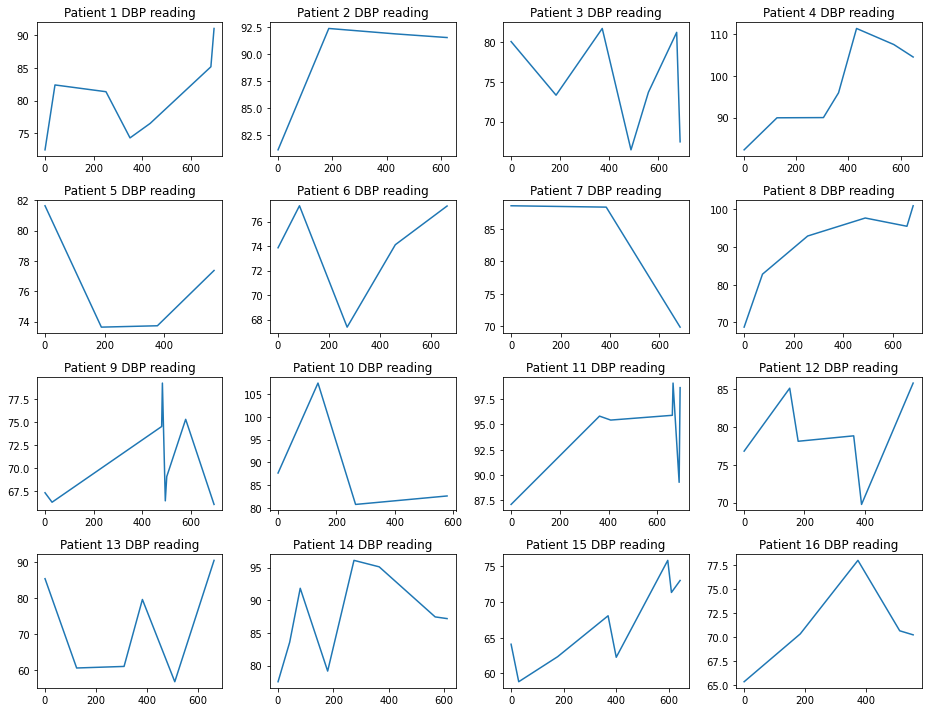

In [11]:
# to check the DBP value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=dbp[dbp['id']==i])
    plt.title(f'Patient {i} DBP reading')
    plt.tight_layout();

In [12]:
dbp_1 = dbp.groupby('id')['value'].agg(
    min_dbp = 'min',
    max_dbp = 'max',
    mean_dbp = 'mean',
    std_dbp = 'std').reset_index()
dbp_1['last_dbp'] = dbp.groupby('id').tail(1).reset_index()['value']
display(dbp_1.head())
display(dbp_1.shape)

,id,min_dbp,max_dbp,mean_dbp,std_dbp,last_dbp
0,0,65.97,95.32,83.173750,8.439941,84.29
1,1,72.49,90.99,80.455714,6.509255,90.99
2,2,81.13,92.36,89.217500,5.402693,91.52
3,3,66.44,81.74,74.857143,6.390231,67.45
4,4,82.23,111.44,97.385714,10.760423,104.57


(300, 6)

## Demo Patients

In [13]:
# Check the data shape
print(f'Demo table has {demo.shape[0]} data and {demo.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(demo.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(demo.info())
print('-'*88)

# Check number of unique id
print(f'Demo table has {demo["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(demo.isnull().sum())

Demo table has 300 data and 4 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,race,gender,age
0,0,Unknown,Male,70
1,1,White,Female,71
2,2,White,Female,57
3,3,White,Male,74
4,4,White,Female,50
5,5,Black,Male,73
6,6,White,Female,60
7,7,Asian,Female,62
8,8,White,Female,68
9,9,White,Female,80


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      300 non-null    int64 
 1   race    300 non-null    object
 2   gender  300 non-null    object
 3   age     300 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.5+ KB


None

----------------------------------------------------------------------------------------
Demo table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id        0
race      0
gender    0
age       0
dtype: int64


In [14]:
# to remove duplicate data
demo.drop_duplicates()
demo.shape

(300, 4)

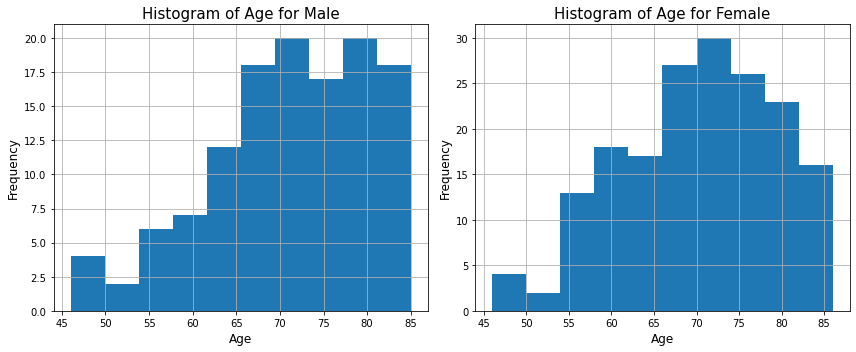

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

demo[demo['gender'] == 'Male']['age'].hist(bins=10, ax = ax1)
ax1.set_title('Histogram of Age for Male', fontsize=15)
ax1.set_xlabel('Age', fontsize = 12)
ax1.set_ylabel('Frequency', fontsize = 12)

demo[demo['gender'] == 'Female']['age'].hist(bins=10, ax = ax2)
ax2.set_title('Histogram of Age for Female', fontsize=15)
ax2.set_xlabel('Age', fontsize = 12)
ax2.set_ylabel('Frequency', fontsize = 12)

plt.tight_layout();

In [16]:
# count of race
demo['race'].value_counts()

White       226
Unknown      26
Black        24
Asian        17
Hispanic      7
Name: race, dtype: int64

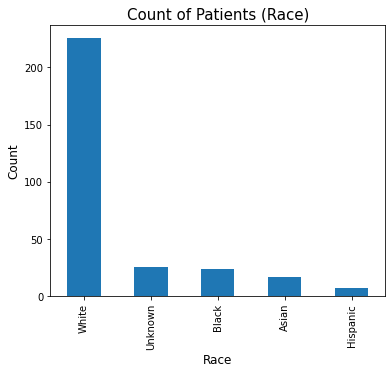

In [17]:
plt.figure(figsize=(6,5))
demo['race'].value_counts().plot(kind='bar')
plt.title(label='Count of Patients (Race)', fontsize=15)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12);

In [18]:
# count of gender
demo['gender'].value_counts()

Female    176
Male      124
Name: gender, dtype: int64

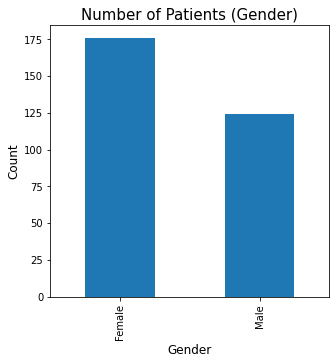

In [19]:
plt.figure(figsize=(5,5))
demo['gender'].value_counts().plot(kind='bar')
plt.title(label='Number of Patients (Gender)', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12);

## Glucose

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

In [20]:
# Check the data shape
print(f'Glucose table has {glucose.shape[0]} data and {glucose.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(glucose.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(glucose.info())
print('-'*88)

# Check number of unique id
print(f'Glucose table has {glucose["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(glucose.isnull().sum())

Glucose table has 1556 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,6.24,0
1,0,7.20,107
2,0,7.01,286
3,0,6.89,382
4,0,5.62,580
5,0,5.78,688
6,1,9.96,0
7,1,8.27,221
8,1,8.43,319
9,1,9.76,402


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1556 non-null   int64  
 1   value   1556 non-null   float64
 2   time    1556 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 36.6 KB


None

----------------------------------------------------------------------------------------
Glucose table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [21]:
# to remove duplicate data
glucose.drop_duplicates()
glucose.shape

(1556, 3)

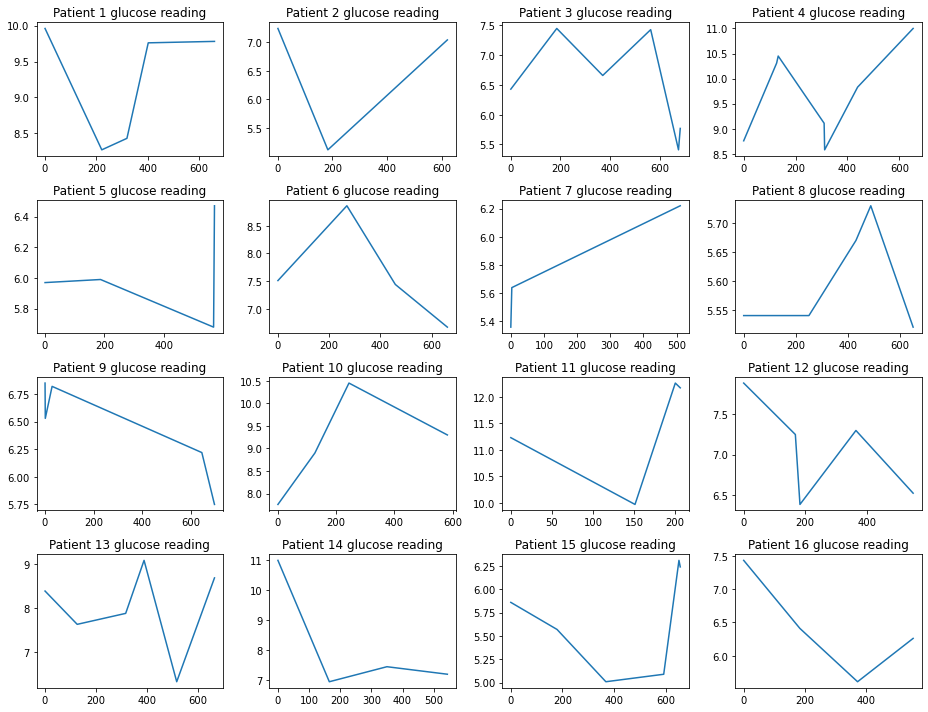

In [22]:
# to check the glucose value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=glucose[glucose['id']==i])
    plt.title(f'Patient {i} glucose reading')
    plt.tight_layout();

In [23]:
glucose_1 = glucose.groupby('id')['value'].agg(
    min_glu = 'min',
    max_glu = 'max',
    mean_glu = 'mean',
    std_glu = 'std').reset_index()
glucose_1['last_glu'] = glucose.groupby('id').tail(1).reset_index()['value']
display(glucose_1.head())
display(glucose_1.shape)

,id,min_glu,max_glu,mean_glu,std_glu,last_glu
0,0,5.62,7.20,6.456667,0.671019,5.78
1,1,8.27,9.96,9.240000,0.818138,9.78
2,2,5.12,7.24,6.466667,1.170527,7.04
3,3,5.41,7.45,6.525000,0.838469,5.77
4,4,8.58,11.00,9.720000,0.924193,11.00


(300, 6)

## Hemoglobin (HGB)

Hemoglobin is the protein molecule in red blood cells that carries oxygen from the lungs to the body's tissues and returns carbon dioxide from the tissues back to the lungs. A normal hemoglobin level is 11 to 18 grams per deciliter (g/dL), depending on your age and gender. But 7 to 8 g/dL is a safe level.

In [24]:
# Check the data shape
print(f'HGB table has {hgb.shape[0]} data and {hgb.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(hgb.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(hgb.info())
print('-'*88)

# Check number of unique id
print(f'HGB table has {hgb["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(hgb.isnull().sum())

HGB table has 2025 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,13.51,0
1,0,13.39,107
2,0,12.84,286
3,0,13.32,382
4,0,13.53,688
5,0,13.36,783
6,0,12.63,887
7,0,13.65,1076
8,0,13.13,1196
9,1,13.89,0


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2025 non-null   int64  
 1   value   2025 non-null   float64
 2   time    2025 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.6 KB


None

----------------------------------------------------------------------------------------
HGB table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [25]:
# to remove duplicate data
hgb.drop_duplicates()
hgb.shape

(2025, 3)

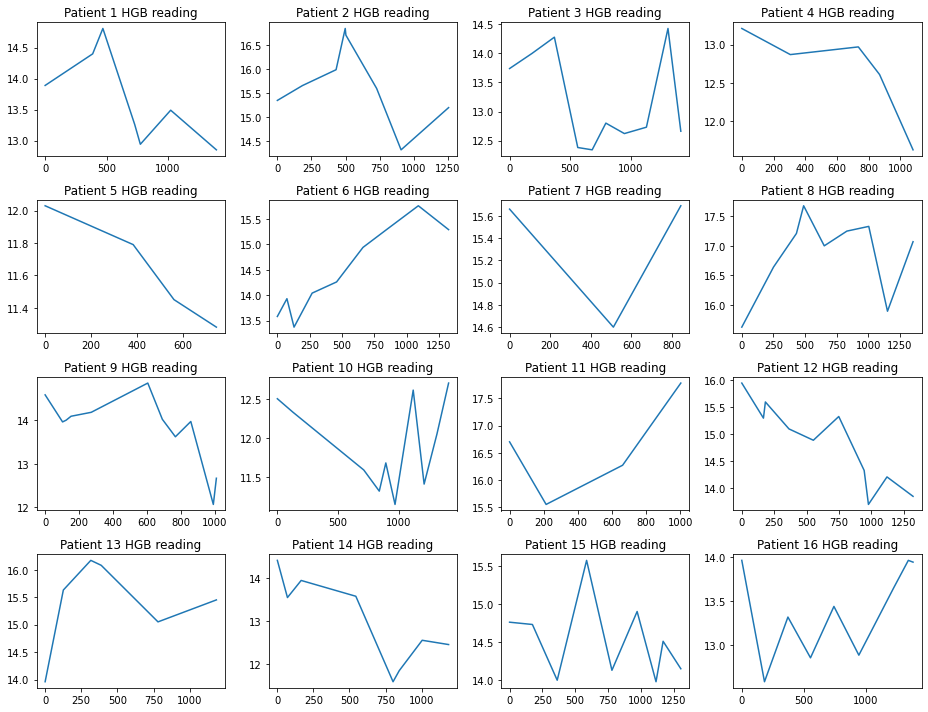

In [26]:
# to check the HGB value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=hgb[hgb['id']==i])
    plt.title(f'Patient {i} HGB reading')
    plt.tight_layout();

In [27]:
hgb_1 = hgb.groupby('id')['value'].agg(
    min_hgb = 'min',
    max_hgb = 'max',
    mean_hgb = 'mean',
    std_hgb = 'std').reset_index()
hgb_1['last_hgb'] = hgb.groupby('id').tail(1).reset_index()['value']
display(hgb_1.head())
display(hgb_1.shape)

,id,min_hgb,max_hgb,mean_hgb,std_hgb,last_hgb
0,0,12.63,13.65,13.262222,0.336926,13.13
1,1,12.85,14.81,13.662857,0.740084,12.85
2,2,14.31,16.84,15.700000,0.820662,15.19
3,3,12.34,14.43,13.198000,0.818655,12.66
4,4,11.63,13.21,12.658000,0.613612,11.63


(300, 6)

## Low-Density Lipoprotein (LDL) Cholesterol

LDL cholesterol is often called the “bad” cholesterol because it collects in the walls of your blood vessels, raising your chances of health problems like a heart attack or stroke. An LDL cholesterol level of less than less than 2.6 mmol/L (100 mg/dL) is considered optimal. 2.6 to 3.4 (100 to 129) is considered near optimal. 3.5 to 4.1 (130 to 159) is considered borderline high.

In [28]:
# Check the data shape
print(f'Ldl table has {ldl.shape[0]} data and {ldl.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(ldl.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(ldl.info())
print('-'*88)

# Check number of unique id
print(f'Ldl table has {ldl["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(ldl.isnull().sum())

Ldl table has 1261 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,161.49,0
1,0,111.39,107
2,0,157.90,382
3,1,89.57,0
4,1,98.73,221
5,1,71.56,319
6,1,79.02,402
7,1,73.24,660
8,2,61.62,0
9,2,77.09,184


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1261 non-null   int64  
 1   value   1261 non-null   float64
 2   time    1261 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 29.7 KB


None

----------------------------------------------------------------------------------------
Ldl table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [29]:
# to remove duplicate data
ldl.drop_duplicates()
ldl.shape

(1261, 3)

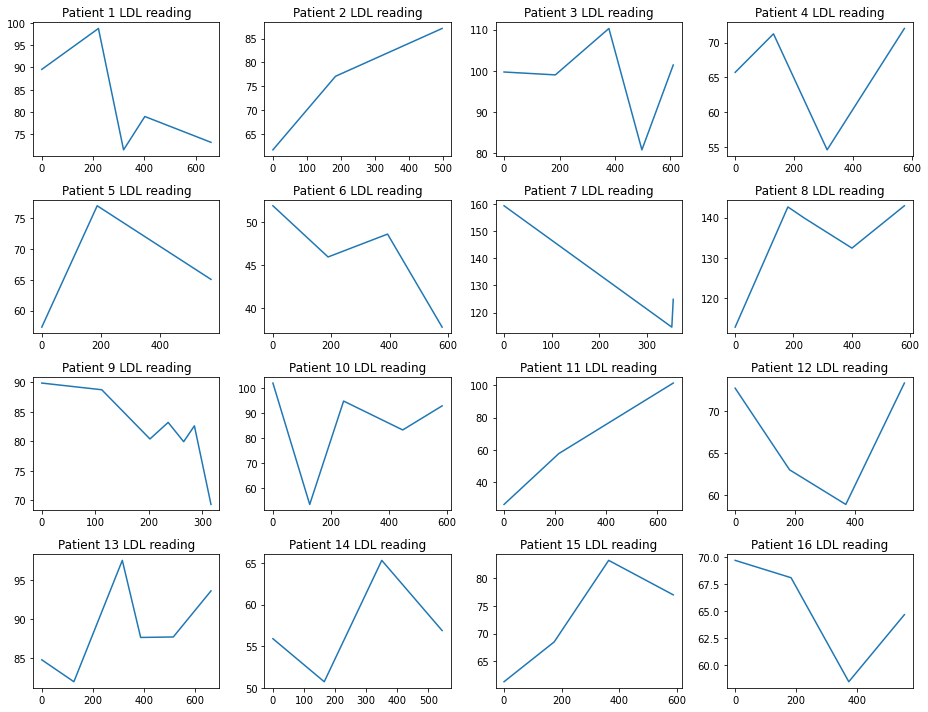

In [30]:
# to check the LDL value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=ldl[ldl['id']==i])
    plt.title(f'Patient {i} LDL reading')
    plt.tight_layout();

In [31]:
ldl_1 = ldl.groupby('id')['value'].agg(
    min_ldl = 'min',
    max_ldl = 'max',
    mean_ldl = 'mean',
    std_ldl = 'std').reset_index()
ldl_1['last_ldl'] = ldl.groupby('id').tail(1).reset_index()['value']
display(ldl_1.head())
display(ldl_1.shape)

,id,min_ldl,max_ldl,mean_ldl,std_ldl,last_ldl
0,0,111.39,161.49,143.593333,27.946610,157.90
1,1,71.56,98.73,82.424000,11.520748,73.24
2,2,61.62,87.14,75.283333,12.855568,87.14
3,3,80.80,110.29,98.246000,10.749676,101.42
4,4,54.61,72.03,65.907500,8.037397,72.03


(300, 6)

## Medications

Medication records for each patient

In [32]:
# Check the data shape
print(f'Meds table has {meds.shape[0]} data and {meds.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(meds.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(meds.info())
print('-'*88)

# Check number of unique id
print(f'Meds table has {meds["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(meds.isnull().sum())

Meds table has 2181 data and 5 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,drug,daily_dosage,start_day,end_day
0,0,atorvastatin,10.0,19,109
1,0,atorvastatin,10.0,117,207
2,0,losartan,100.0,19,289
3,0,losartan,100.0,403,493
4,0,losartan,100.0,587,677
5,0,metformin,1000.0,19,109
6,0,metformin,1000.0,131,281
7,0,metformin,1000.0,309,399
8,0,metformin,1000.0,312,462
9,0,metformin,1000.0,467,557


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2181 non-null   int64  
 1   drug          2181 non-null   object 
 2   daily_dosage  2181 non-null   float64
 3   start_day     2181 non-null   int64  
 4   end_day       2181 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 85.3+ KB


None

----------------------------------------------------------------------------------------
Meds table has 272 unique id.
----------------------------------------------------------------------------------------
Check null value

id              0
drug            0
daily_dosage    0
start_day       0
end_day         0
dtype: int64


In [33]:
# to remove duplicate data
meds.drop_duplicates()
meds.shape

(2181, 5)

In [34]:
meds['drug'].value_counts()

metformin        482
atorvastatin     357
simvastatin      258
losartan         251
metoprolol       211
valsartan        110
atenolol         104
rosuvastatin     103
pravastatin      100
carvedilol        57
lovastatin        47
olmesartan        33
bisoprolol        13
propranolol       11
irbesartan        11
canagliflozin      7
telmisartan        7
nebivolol          7
labetalol          5
pitavastatin       4
dapagliflozin      3
Name: drug, dtype: int64

In [35]:
meds['id'].nunique()

272

In [36]:
meds['drug'].unique()

array(['atorvastatin', 'losartan', 'metformin', 'rosuvastatin',
       'pravastatin', 'carvedilol', 'valsartan', 'metoprolol',
       'simvastatin', 'bisoprolol', 'atenolol', 'lovastatin',
       'olmesartan', 'irbesartan', 'canagliflozin', 'dapagliflozin',
       'telmisartan', 'labetalol', 'nebivolol', 'pitavastatin',
       'propranolol'], dtype=object)

There are 21 different drugs taken by the patients. I will group the medications into blood pressure drug, cholesterol drug and diabetes drug to identify which patients have any of the symptoms and total different drug(s) they are taking now.

In [37]:
meds_1 = meds.drop_duplicates(subset=('id','drug')).reset_index()[['id','drug']]
meds_1.head()

,id,drug
0,0,atorvastatin
1,0,losartan
2,0,metformin
3,1,atorvastatin
4,2,rosuvastatin


In [38]:
blood_pressure_drug = ['losartan','carvedilol','valsartan','metoprolol','bisoprolol','atenolol', 
                  'olmesartan','irbesartan','telmisartan','labetalol','nebivolol','propranolol']

cholesterol_drug = ['atorvastatin','rosuvastatin','pravastatin','simvastatin','lovastatin','pitavastatin']

diabetes_drug = ['metformin','canagliflozin','dapagliflozin']

In [39]:
blood_pressure = []
cholesterol = []
diabetes = []

for ite, val in enumerate(meds_1['drug']):
    if meds_1['drug'][ite] in blood_pressure_drug:
        blood_pressure.append(1)
        cholesterol.append(0)
        diabetes.append(0)
    elif meds_1['drug'][ite] in cholesterol_drug:
        blood_pressure.append(0)
        cholesterol.append(1)
        diabetes.append(0)
    else:
        blood_pressure.append(0)
        cholesterol.append(0)
        diabetes.append(1)
meds_1['blood_pressure'] = blood_pressure
meds_1['cholesterol'] = cholesterol
meds_1['diabetes'] = diabetes

In [40]:
meds_1.head()

,id,drug,blood_pressure,cholesterol,diabetes
0,0,atorvastatin,0,1,0
1,0,losartan,1,0,0
2,0,metformin,0,0,1
3,1,atorvastatin,0,1,0
4,2,rosuvastatin,0,1,0


In [41]:
meds_2 = meds_1.groupby(['id'], as_index=False).sum()[['id','blood_pressure','cholesterol','diabetes']]
meds_2.head()

,id,blood_pressure,cholesterol,diabetes
0,0,1,1,1
1,1,0,1,0
2,2,0,1,0
3,3,0,1,0
4,4,1,1,1


In [42]:
meds_2.shape

(272, 4)

## Systolic Blood Pressure (SBP)

Systolic blood pressure (the first number) – indicates how much pressure your blood is exerting against your artery walls when the heart beats. For a normal reading, your blood pressure needs to show a top number (systolic pressure) that's between 90 and less than 120 and a bottom number (diastolic pressure) that's between 60 and less than 80. At Risk (prehypertension)	systolic: 120–139 mm Hg, High Blood Pressure (hypertension)	systolic: 140 mm Hg or higher.

In [43]:
# Check the data shape
print(f'Sbp table has {sbp.shape[0]} data and {sbp.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(sbp.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(sbp.info())
print('-'*88)

# Check number of unique id
print(f'Sbp table has {sbp["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(sbp.isnull().sum())

Sbp table has 1809 data and 3 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,value,time
0,0,134.11,0
1,0,133.75,98
2,0,125.08,279
3,0,136.75,380
4,0,130.50,475
5,0,154.91,580
6,0,154.28,678
7,0,147.50,679
8,1,157.46,0
9,1,153.59,41


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1809 non-null   int64  
 1   value   1809 non-null   float64
 2   time    1809 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 42.5 KB


None

----------------------------------------------------------------------------------------
Sbp table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id       0
value    0
time     0
dtype: int64


In [44]:
# to remove duplicate data
sbp.drop_duplicates()
sbp.shape

(1809, 3)

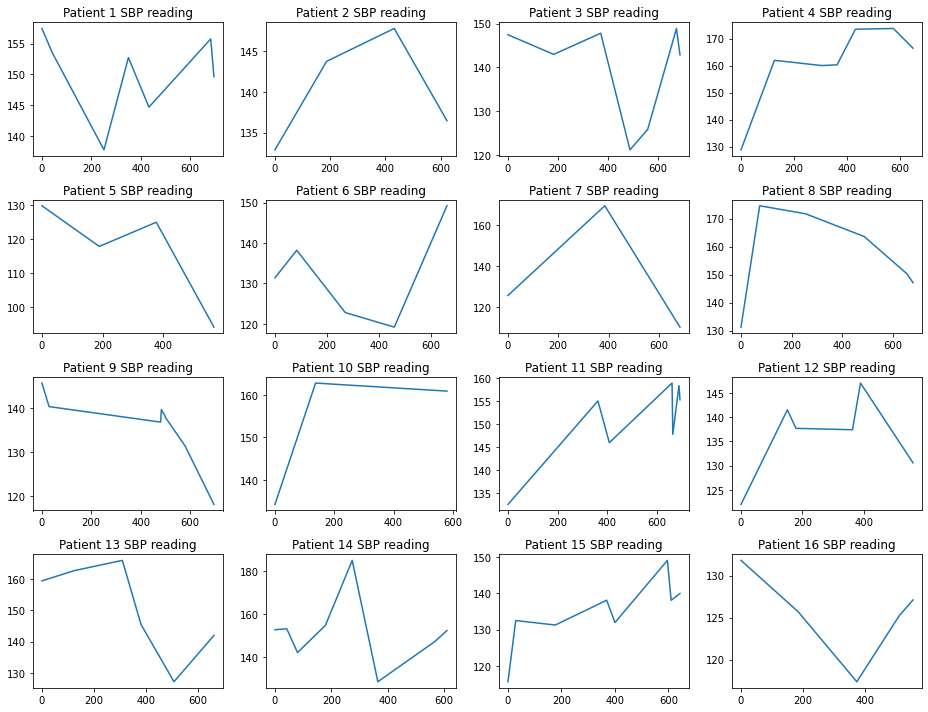

In [45]:
# to check the SBP value of the patients

plt.figure(figsize=(13,10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot('time', 'value', data=sbp[sbp['id']==i])
    plt.title(f'Patient {i} SBP reading')
    plt.tight_layout();

In [46]:
sbp_1 = sbp.groupby('id')['value'].agg(
    min_sbp = 'min',
    max_sbp = 'max',
    mean_sbp = 'mean',
    std_sbp = 'std').reset_index()
sbp_1['last_sbp'] = sbp.groupby('id').tail(1).reset_index()['value']
display(sbp_1.head())
display(sbp_1.shape)

,id,min_sbp,max_sbp,mean_sbp,std_sbp,last_sbp
0,0,125.08,154.91,139.610000,11.202252,147.50
1,1,137.75,157.46,150.232857,6.919431,149.66
2,2,132.89,147.76,140.210000,6.758644,136.46
3,3,121.21,148.89,139.588571,11.282921,142.88
4,4,128.78,173.75,160.667143,15.205728,166.45


(300, 6)

## Stage Progress

This feature is our target variable. It refers to the current stage of CKD in the patient. The True stands for patient still have CKD and False means the patient doesn't have any symptom. 

In [47]:
# Check the data shape
print(f'Stage table has {stage.shape[0]} data and {stage.shape[1]} features.')
print('-'*88)

# Check the dataset
print('Top 10 data')
display(stage.head(10))
print('-'*88)

# Check the data types
print('Key information of the dataset\n')
display(stage.info())
print('-'*88)

# Check number of unique id
print(f'Stage table has {stage["id"].nunique()} unique id.')
print('-'*88)

# Check null value
print('Check null value\n')
print(stage.isnull().sum())

Stage table has 300 data and 2 features.
----------------------------------------------------------------------------------------
Top 10 data


,id,Stage_Progress
0,0,True
1,1,False
2,2,True
3,3,False
4,4,True
5,5,False
6,6,False
7,7,False
8,8,True
9,9,False


----------------------------------------------------------------------------------------
Key information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              300 non-null    int64
 1   Stage_Progress  300 non-null    bool 
dtypes: bool(1), int64(1)
memory usage: 2.8 KB


None

----------------------------------------------------------------------------------------
Stage table has 300 unique id.
----------------------------------------------------------------------------------------
Check null value

id                0
Stage_Progress    0
dtype: int64


In [48]:
# to remove duplicate data
stage.drop_duplicates()
stage.shape

(300, 2)

In [49]:
stage['Stage_Progress'].value_counts()

False    200
True     100
Name: Stage_Progress, dtype: int64

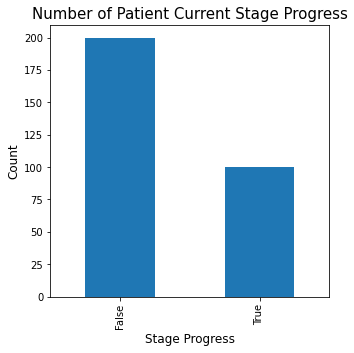

In [50]:
plt.figure(figsize=(5,5))
stage['Stage_Progress'].value_counts().plot(kind='bar')
plt.title(label='Number of Patient Current Stage Progress', fontsize=15)
plt.xlabel('Stage Progress', fontsize=12)
plt.ylabel('Count', fontsize=12);

The above plot confirms the findings that -

- There are 200 patients suffering from CKD, and

- There are 100 patients who do not exhibit any CKD.

## Combine table

In [51]:
data_frames = [demo, stage, meds_2, creatinine_1, dbp_1, glucose_1, hgb_1, ldl_1, sbp_1]

In [52]:
df_combined = reduce(lambda left, right: pd.merge(left, right, on=['id'],
                     how='outer'), data_frames).fillna('0')
df_combined.head()

,id,race,gender,age,Stage_Progress,blood_pressure,cholesterol,diabetes,min_cr,max_cr,mean_cr,std_cr,last_cr,min_dbp,max_dbp,mean_dbp,std_dbp,last_dbp,min_glu,max_glu,mean_glu,std_glu,last_glu,min_hgb,max_hgb,mean_hgb,std_hgb,last_hgb,min_ldl,max_ldl,mean_ldl,std_ldl,last_ldl,min_sbp,max_sbp,mean_sbp,std_sbp,last_sbp
0,0,Unknown,Male,70,True,1,1,1,1.08,1.44,1.236667,0.123558,1.23,65.97,95.32,83.173750,8.439941,84.29,5.62,7.20,6.456667,0.671019,5.78,12.63,13.65,13.262222,0.336926,13.13,111.39,161.49,143.593333,27.946610,157.90,125.08,154.91,139.610000,11.202252,147.50
1,1,White,Female,71,False,0,1,0,1.61,2.20,1.838000,0.219932,2.20,72.49,90.99,80.455714,6.509255,90.99,8.27,9.96,9.240000,0.818138,9.78,12.85,14.81,13.662857,0.740084,12.85,71.56,98.73,82.424000,11.520748,73.24,137.75,157.46,150.232857,6.919431,149.66
2,2,White,Female,57,True,0,1,0,1.89,2.51,2.170000,0.239896,2.20,81.13,92.36,89.217500,5.402693,91.52,5.12,7.24,6.466667,1.170527,7.04,14.31,16.84,15.700000,0.820662,15.19,61.62,87.14,75.283333,12.855568,87.14,132.89,147.76,140.210000,6.758644,136.46
3,3,White,Male,74,False,0,1,0,0.74,1.35,0.996000,0.235648,0.90,66.44,81.74,74.857143,6.390231,67.45,5.41,7.45,6.525000,0.838469,5.77,12.34,14.43,13.198000,0.818655,12.66,80.80,110.29,98.246000,10.749676,101.42,121.21,148.89,139.588571,11.282921,142.88
4,4,White,Female,50,True,1,1,1,0.93,1.35,1.150000,0.166253,0.93,82.23,111.44,97.385714,10.760423,104.57,8.58,11.00,9.720000,0.924193,11.00,11.63,13.21,12.658000,0.613612,11.63,54.61,72.03,65.907500,8.037397,72.03,128.78,173.75,160.667143,15.205728,166.45


## eGFR

[eGFR](https://www.kidney.org/atoz/content/gfr) - Estimated glomerular filtration rate is the best test to measure your level of kidney function and determine your stage of kidney disease. Your doctor can calculate it from the results of your blood creatinine test, your age, body size and gender. Your GFR tells your doctor your stage of kidney disease and helps the doctor plan your treatment. If your GFR number is low, your kidneys are not working as well as they should. The earlier kidney disease is detected, the better the chance of slowing or stopping its progression.

eGFR = 175 x (SCr)-1.154 x (age)-0.203 x 0.742 [if female] x 1.212 [if Black]

where:
1. eGFR (estimated glomerular filtration rate) = mL/min/1.73 m2

2. Scr (standardized serum creatinine) = mg/dL

3. age = years

In [53]:
# create eGFR data base on the latest time of creatinine
egfr = []

for i in range(len(df_combined['id'])):
    if (df_combined['gender'][i] == 'Female') & (df_combined['race'][i] == 'Black'):
        egfr_cal = 175 * (df_combined['last_cr'][i] ** -1.154) * (df_combined['age'][i] ** -0.203) * 0.742 * 1.212
        egfr.append(egfr_cal)
    elif df_combined['gender'][i] == 'Female':
        egfr_cal = 175 * (df_combined['last_cr'][i] ** -1.154) * (df_combined['age'][i] ** -0.203) * 0.742
        egfr.append(egfr_cal)
    elif df_combined['race'][i] == 'Black':
        egfr_cal = 175 * (df_combined['last_cr'][i] ** -1.154) * (df_combined['age'][i] ** -0.203) * 1.212
        egfr.append(egfr_cal)
    else:
        egfr_cal = 175 * (df_combined['last_cr'][i] ** -1.154) * (df_combined['age'][i] ** -0.203)
        egfr.append(egfr_cal)
df_combined['egfr'] = egfr

In [54]:
df_combined.head()

,id,race,gender,age,Stage_Progress,blood_pressure,cholesterol,diabetes,min_cr,max_cr,mean_cr,std_cr,last_cr,min_dbp,max_dbp,mean_dbp,std_dbp,last_dbp,min_glu,max_glu,mean_glu,std_glu,last_glu,min_hgb,max_hgb,mean_hgb,std_hgb,last_hgb,min_ldl,max_ldl,mean_ldl,std_ldl,last_ldl,min_sbp,max_sbp,mean_sbp,std_sbp,last_sbp,egfr
0,0,Unknown,Male,70,True,1,1,1,1.08,1.44,1.236667,0.123558,1.23,65.97,95.32,83.173750,8.439941,84.29,5.62,7.20,6.456667,0.671019,5.78,12.63,13.65,13.262222,0.336926,13.13,111.39,161.49,143.593333,27.946610,157.90,125.08,154.91,139.610000,11.202252,147.50,58.174498
1,1,White,Female,71,False,0,1,0,1.61,2.20,1.838000,0.219932,2.20,72.49,90.99,80.455714,6.509255,90.99,8.27,9.96,9.240000,0.818138,9.78,12.85,14.81,13.662857,0.740084,12.85,71.56,98.73,82.424000,11.520748,73.24,137.75,157.46,150.232857,6.919431,149.66,22.002941
2,2,White,Female,57,True,0,1,0,1.89,2.51,2.170000,0.239896,2.20,81.13,92.36,89.217500,5.402693,91.52,5.12,7.24,6.466667,1.170527,7.04,14.31,16.84,15.700000,0.820662,15.19,61.62,87.14,75.283333,12.855568,87.14,132.89,147.76,140.210000,6.758644,136.46,23.006131
3,3,White,Male,74,False,0,1,0,0.74,1.35,0.996000,0.235648,0.90,66.44,81.74,74.857143,6.390231,67.45,5.41,7.45,6.525000,0.838469,5.77,12.34,14.43,13.198000,0.818655,12.66,80.80,110.29,98.246000,10.749676,101.42,121.21,148.89,139.588571,11.282921,142.88,82.487502
4,4,White,Female,50,True,1,1,1,0.93,1.35,1.150000,0.166253,0.93,82.23,111.44,97.385714,10.760423,104.57,8.58,11.00,9.720000,0.924193,11.00,11.63,13.21,12.658000,0.613612,11.63,54.61,72.03,65.907500,8.037397,72.03,128.78,173.75,160.667143,15.205728,166.45,63.814845


In [55]:
df_combined.to_csv('df_combined.csv', index=False)